In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator

file = './logs/linpack_Page_64_Levels_3_L1_size_10_sets_2_L2_size_200_sets_1_L3_size_800_sets_1_ddr_banks_16_row_size2_ip_0.csv'

data = pd.read_csv(file, delimiter=';')

data = data.apply(pd.to_numeric, errors='ignore')

hit_sum = ['L1_HIT', 'L2_HIT', 'L3_HIT']
write_back_sum = ['L1_WB', 'L2_WB', 'L3_WB']
swap_sum = ['L2_SWAP', 'L3_SWAP']
ddr_sum = ['DDR_CAS', 'DDR_RAS']
ras_sum = ['DDR_RAS']


window_size = 10000
reduse_step = 1000
data.head()

,Trace_No,Addr,L1_HIT,L2_HIT,L3_HIT,L1_WB,L2_WB,L3_WB,L2_SWAP,L3_SWAP,DDR_CAS,DDR_RAS
0,0,67108796,1,1,1,1,0,0,0,0,1,1
1,1,67108795,1,1,1,1,0,0,0,0,1,1
2,2,4294962916,1,0,0,0,0,0,0,0,0,0
3,3,4294962912,1,0,0,0,0,0,0,0,0,0
4,4,4294962924,1,0,0,0,0,0,0,0,0,0


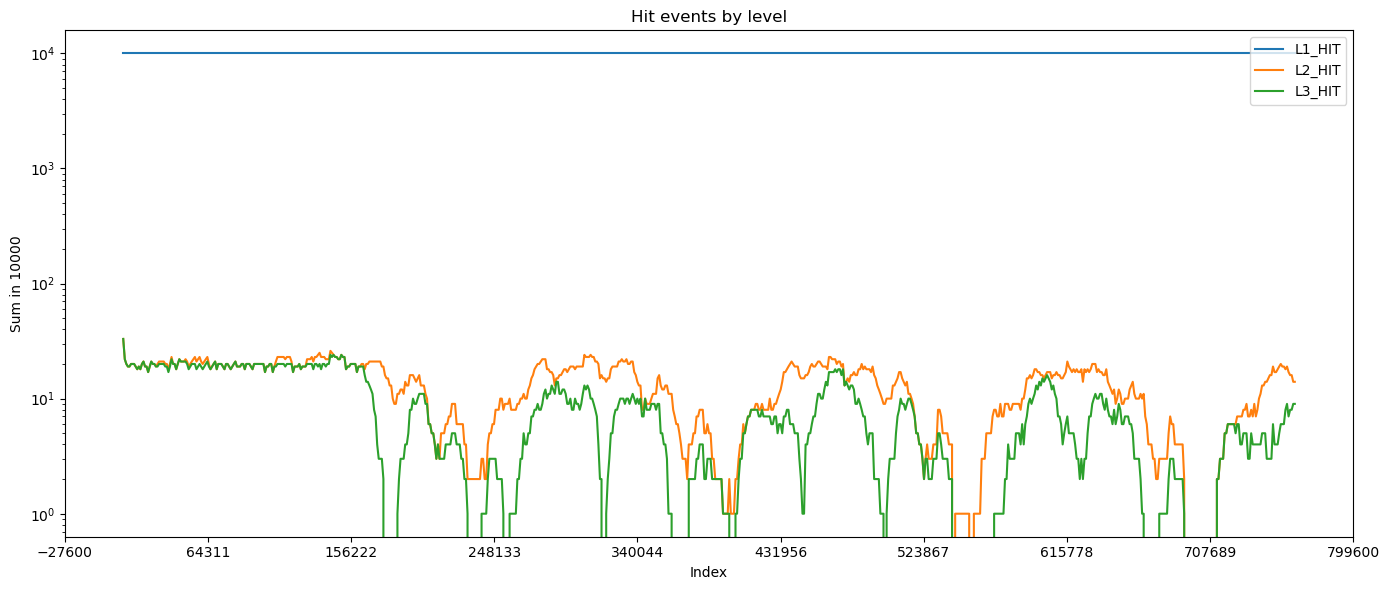

In [107]:

rolling_sums = data[hit_sum].rolling(window=window_size).sum()

reduced_rolling_sums = rolling_sums[::reduse_step].copy()
reduced_rolling_sums['Trace_No'] = data['Trace_No'][::reduse_step].values

fig, axs = plt.subplots(figsize=(14, 6), sharex=True)

for col in hit_sum:
    axs.plot(reduced_rolling_sums['Trace_No'], reduced_rolling_sums[col], label=col)
axs.set_ylabel(f'Sum in {window_size}')
axs.set_yscale('log')
axs.legend(loc='upper right')
axs.set_title('Hit events by level')
axs.set_xlabel('Index')
axs.xaxis.set_major_locator(LinearLocator(numticks=10))

plt.tight_layout()
plt.show()

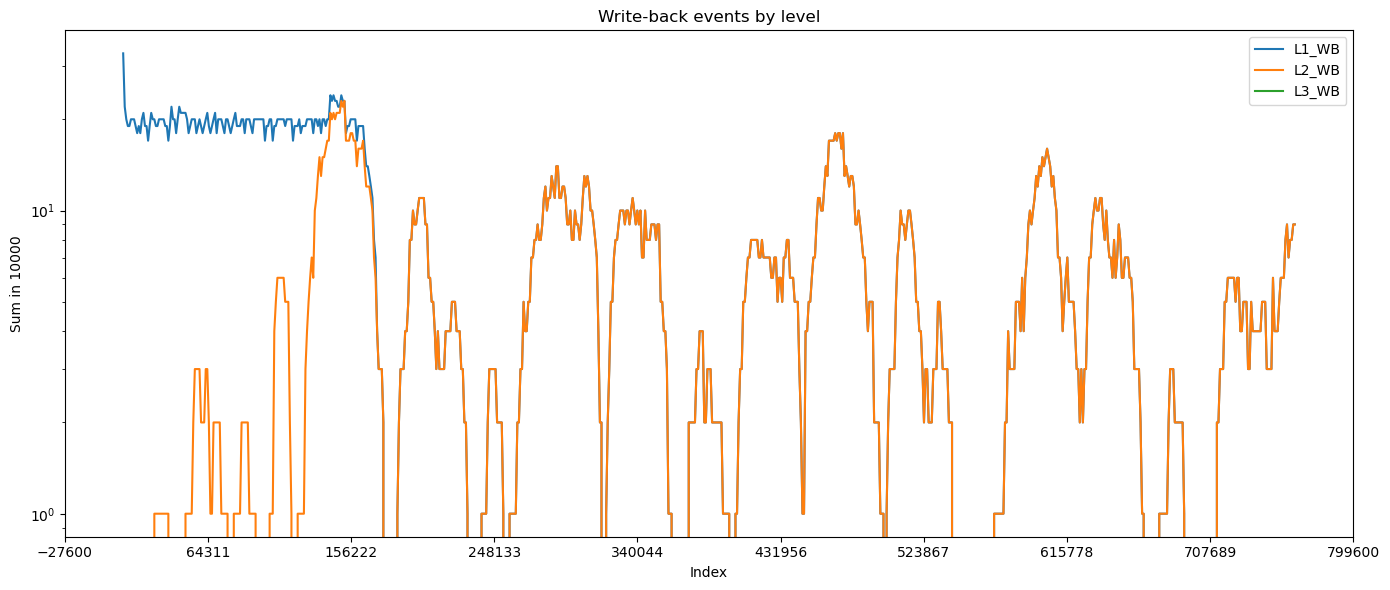

In [108]:
rolling_sums = data[write_back_sum].rolling(window=window_size).sum()

reduced_rolling_sums = rolling_sums[::reduse_step].copy()
reduced_rolling_sums['Trace_No'] = data['Trace_No'][::reduse_step].values

fig, axs = plt.subplots(figsize=(14, 6), sharex=True)

for col in write_back_sum:
    axs.plot(reduced_rolling_sums['Trace_No'], reduced_rolling_sums[col], label=col)
axs.set_ylabel(f'Sum in {window_size}')
axs.set_yscale('log')
axs.legend(loc='upper right')
axs.set_title('Write-back events by level')
axs.set_xlabel('Index')
axs.xaxis.set_major_locator(LinearLocator(numticks=10))

plt.tight_layout()
plt.show()

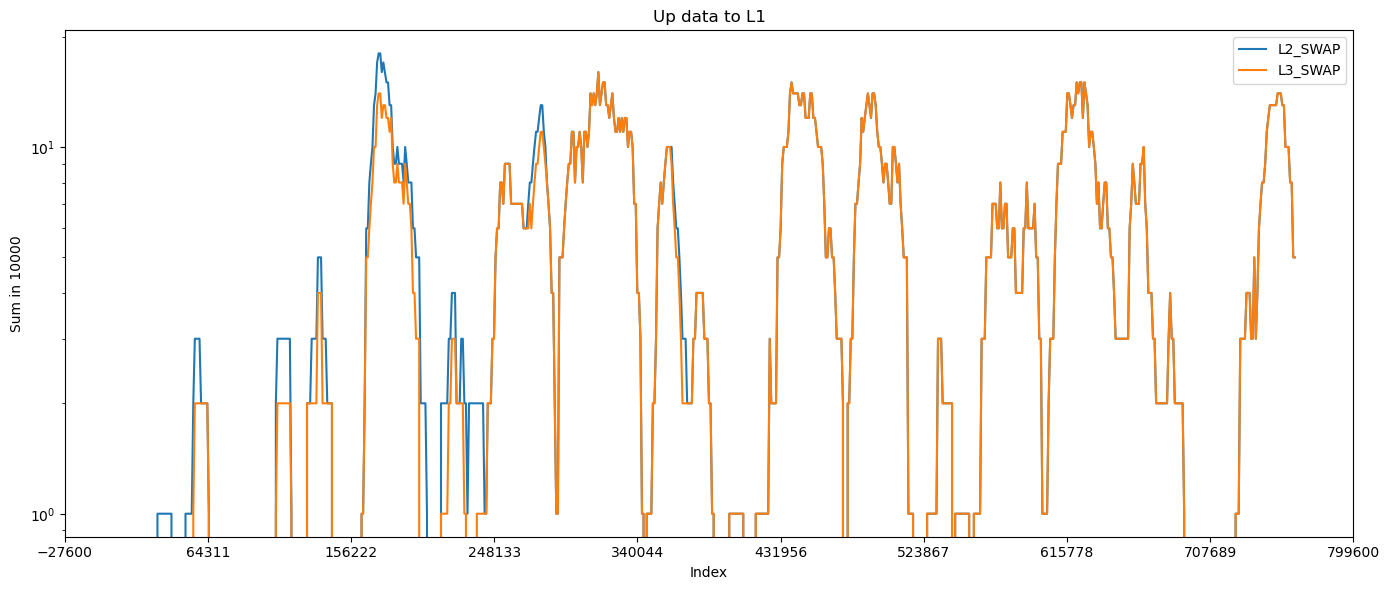

In [109]:
rolling_sums = data[swap_sum].rolling(window=window_size).sum()

reduced_rolling_sums = rolling_sums[::reduse_step].copy()
reduced_rolling_sums['Trace_No'] = data['Trace_No'][::reduse_step].values

fig, axs = plt.subplots(figsize=(14, 6), sharex=True)

for col in swap_sum:
    axs.plot(reduced_rolling_sums['Trace_No'], reduced_rolling_sums[col], label=col)
axs.set_ylabel(f'Sum in {window_size}')
axs.set_yscale('log')
axs.legend(loc='upper right')
axs.set_title('Up data to L1')
axs.set_xlabel('Index')
axs.xaxis.set_major_locator(LinearLocator(numticks=10))

plt.tight_layout()
plt.show()

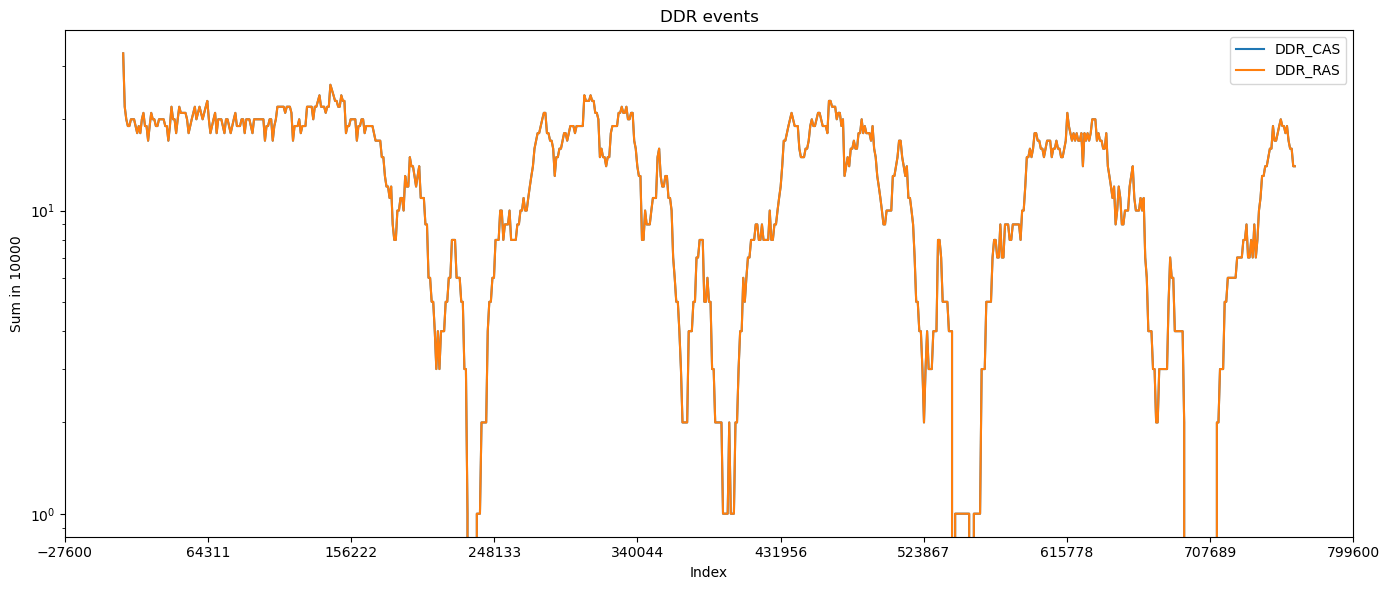

In [110]:
rolling_sums = data[ddr_sum].rolling(window=window_size).sum()

reduced_rolling_sums = rolling_sums[::reduse_step].copy()
reduced_rolling_sums['Trace_No'] = data['Trace_No'][::reduse_step].values

fig, axs = plt.subplots(figsize=(14, 6), sharex=True)

for col in ddr_sum:
    axs.plot(reduced_rolling_sums['Trace_No'], reduced_rolling_sums[col], label=col)
axs.set_ylabel(f'Sum in {window_size}')
axs.set_yscale('log')
axs.legend(loc='upper right')
axs.set_title('DDR events')
axs.set_xlabel('Index')
axs.xaxis.set_major_locator(LinearLocator(numticks=10))

plt.tight_layout()
plt.show()